In [1]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pprint

np.random.seed(42)

import pandas as pd
from numpy.linalg import lstsq, cholesky
from scipy.linalg import sqrtm, schur, block_diag
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from ClassBSplines import BSpline
from TensorProductSplines import TensorProductSpline
from PenaltyMatrices import PenaltyMatrix
from Smooth import Smooths as s
from Smooth import TP_Smooths as tps
 
from ClassBSplines import BSpline as b
from TensorProductSplines import TensorProductSpline as t
from DiagnosticPlot import DiagnosticPlotter
from Model_Notebook import Model, bar_chart_of_coefficient_difference_dataframe
from Model_Notebook import line_chart_of_coefficient_dataframe, check_constraint, check_constraint_full_model

In [7]:
#########################################################################
## DATA GENERATION TEST CASE
#########################################################################
np.random.seed(42)
X = pd.DataFrame(data={"x1": np.linspace(-2,2,1000), 
                       "x2": np.linspace(0,1,1000), }) #,
                       #"x3": np.linspace(-2,2,1000), "x4": np.linspace(0,1,1000),
                       #"x5": np.linspace(-2,2,1000), "x6": np.linspace(0,1,1000)})
y = pd.DataFrame(data={"y": -2*np.exp(-X["x1"]**2) + 0.1*np.exp(X["x2"]) + 
                       0.1*np.random.randn(len(X["x1"])) + X["x1"] * X["x2"]  })

X_norm = MinMaxScaler().fit_transform(X)
y_norm = MinMaxScaler().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.5, shuffle=True)


#X_test, X_train = X_test.sort_index(), X_train.sort_index()
#y_train, y_test = y_train.sort_index(), y_test.sort_index()

#fig = make_subplots(rows=1, cols=2, 
#                    specs=[[{'type':'scatter'}, {'type':'scatter3d'}] ])
#fig.add_trace(go.Scatter(x=X_norm[:,0], y=y_norm.ravel(), mode="markers", name="Data"), row=1, col=1)
#fig.add_trace(go.Scatter3d(x=X_norm[:,0], y=X_norm[:,1], z=y_norm.ravel(),
#                           name="Data", mode="markers"), row=1, col=2)
#fig.show()

#########################################################################
# TEST CASE
#########################################################################
m = ( ('s(1)', 'valley', 25, (1, 1000)),  
      ('s(2)', 'smooth', 25, (1, 1000)), )
    #  ('t(1,2)','tps', [5,5], (1, 1000)), 
    # ('s(3)', 'smooth', 10, (1,1)), ('s(4)', 'smooth', 10, (1,1)), 
    #    ('s(5)', 'smooth', 10, (1,1)), ('s(6)', 'smooth', 10, (1,1) )  )


Description of the model: 
{'s(1)': {'constraint': 'valley',
          'lambda': {'constraint': 1000, 'smoothness': 1},
          'n_param': 25},
 's(2)': {'constraint': 'smooth',
          'lambda': {'constraint': 1000, 'smoothness': 1},
          'n_param': 25},
 's(3)': {'constraint': 'smooth',
          'lambda': {'constraint': 1, 'smoothness': 1},
          'n_param': 10},
 's(4)': {'constraint': 'smooth',
          'lambda': {'constraint': 1, 'smoothness': 1},
          'n_param': 10},
 's(5)': {'constraint': 'smooth',
          'lambda': {'constraint': 1, 'smoothness': 1},
          'n_param': 10},
 's(6)': {'constraint': 'smooth',
          'lambda': {'constraint': 1, 'smoothness': 1},
          'n_param': 10},
 't(1,2)': {'constraint': 'tps',
            'lambda': {'constraint': 1000, 'smoothness': 1},
            'n_param': [5, 5]}}
Type x_data:  <class 'numpy.ndarray'>
Use 'x_basis' for the spline basis!
type x:  <class 'numpy.ndarray'>
Type x_data:  <class 'numpy.ndarray'>


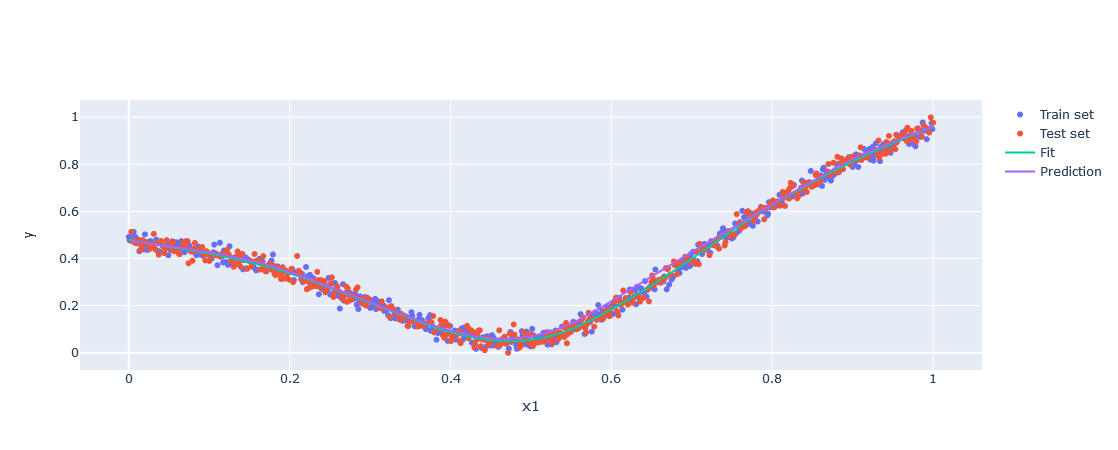

In [8]:
M1 = Model(m)

print("Description of the model: ")
pprint.pprint(M1.description_dict)
f = M1.fit(X_norm, y_norm.ravel(), lam_c=1, plot_=False)
#bar_chart_of_coefficient_difference_dataframe(M1.df_beta)
#line_chart_of_coefficient_dataframe(M1.df_beta)

pred = M1.predict(X=X_test)
print("MSE prediction: ", mean_squared_error(pred.ravel(), y_test.ravel()))

fig = go.Figure()
fig.add_trace(go.Scatter(x=X_train[:,0], y=y_train.ravel(), name="Train set", mode="markers"))
fig.add_trace(go.Scatter(x=X_test[:,0], y=y_test.ravel(), name="Test set",mode="markers"))
fig.add_trace(go.Scatter(x=M1.X_fit[:,0], y=f, name="Fit", mode="lines"))
fig.add_trace(go.Scatter(x=M1.X_pred[:,0], y=pred.ravel(), name="Prediction", mode="lines"))

fig.update_layout(xaxis_title="x1", yaxis_title="y")
fig.show()